## 파이썬 머신러닝
# 유방암 데이터 활용

- scikit-learn 에는 유방암 데이터가 기본적으로 들어있다. 머신러닝 학습에 많이 사용되는 데이터 이므로 익숙해지자.
- 총 30개의 속성과 malignant(악성), benign(양성) 의 두가지 타겟값을 가지고 있다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 데이터 불러오기

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [5]:
type(cancer)

sklearn.utils.Bunch

In [6]:
dir(cancer)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [7]:
cancer.data.shape

(569, 30)

In [8]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

In [15]:
malignant = cancer.data[cancer.target==0]
malignant.shape

(212, 30)

In [16]:
benign = cancer.data[cancer.target==1]
benign.shape

(357, 30)

In [17]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [4]:
k = ['a', 'b', 'c']

for i, v in enumerate(k):
    print(i,'=>', v)

0 => a
1 => b
2 => c


In [12]:
for i,name in enumerate(cancer.feature_names):
    print('%02d : %s' %(i,name))

00 : mean radius
01 : mean texture
02 : mean perimeter
03 : mean area
04 : mean smoothness
05 : mean compactness
06 : mean concavity
07 : mean concave points
08 : mean symmetry
09 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension


In [7]:
cancer.target_names # malignant(악성), benign(양성)

array(['malignant', 'benign'], dtype='<U9')

In [8]:
print('data =>',cancer.data.shape)
print('target =>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>',malignant.shape)
print('benign(양성) =>',benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) => (212, 30)
benign(양성) => (357, 30)


In [10]:
cancer.data.mean(axis=0)

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

### 데이터 시각화

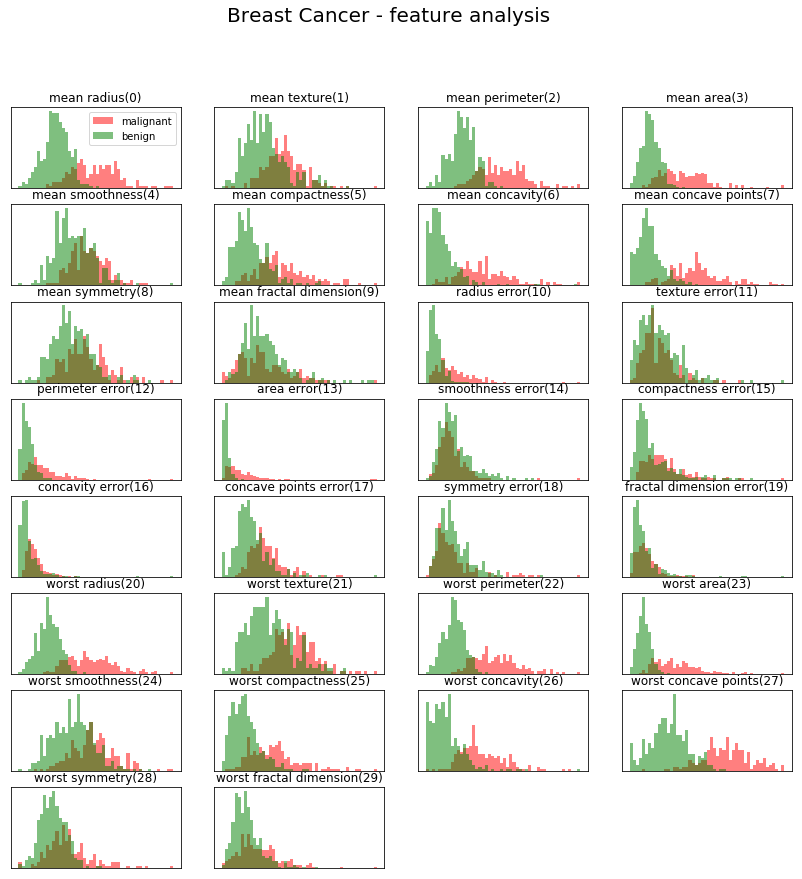

In [16]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
    _,bins=np.histogram(cancer.data[:,col],bins=50)
    plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
    plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
    if col==0: plt.legend()

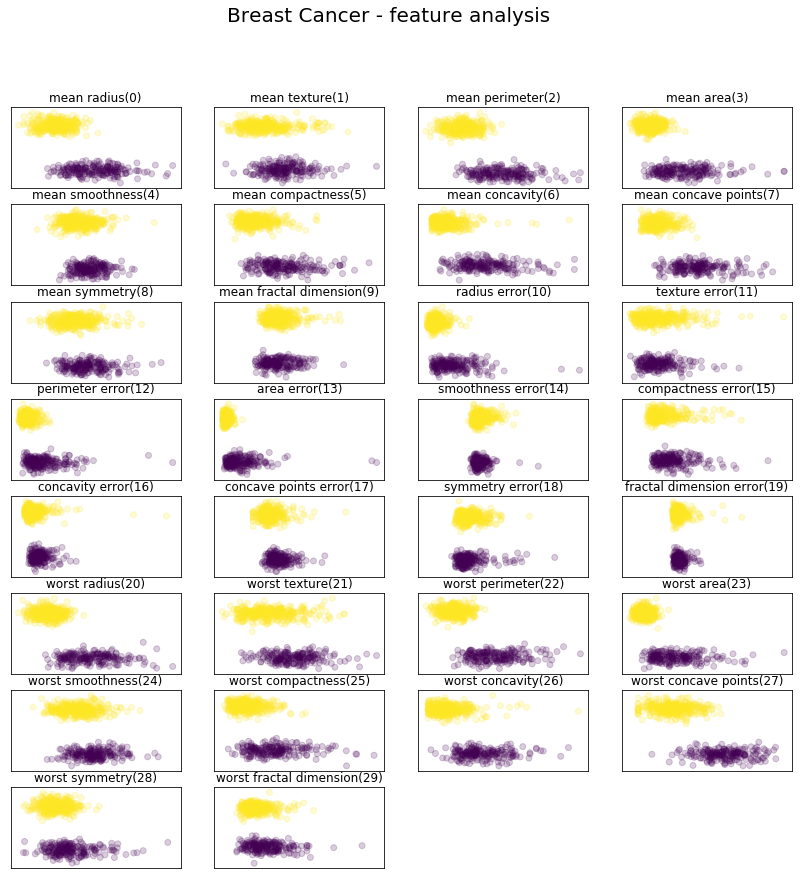

In [17]:
fig=plt.figure(figsize=[14,14])
fig.suptitle('Breast Cancer - feature analysis', fontsize=20)

for col in range(cancer.feature_names.shape[0]): # 30 features
    plt.subplot(8,4,col+1)
#     f_,bins=np.histogram(cancer.data[:,col],bins=50)
#     plt.hist(malignant[:,col], bins=bins, alpha=0.5, label='malignant', color='red')
#     plt.hist(benign[:,col], bins=bins, alpha=0.5, label='benign', color='green')
    plt.scatter(cancer.data[:,col], cancer.target+np.random.normal(0,0.1,size=569),
                c=cancer.target, alpha=0.2)
    
    
    plt.title(cancer.feature_names[col]+('(%d)' % col))
    plt.xticks([])
    plt.yticks([])
#     if col==0: plt.legend()

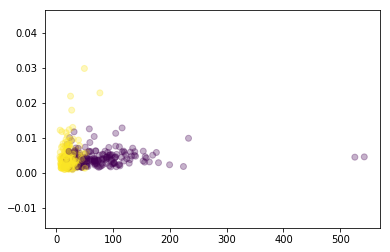

In [12]:
col1 = 13
col2 = 19

plt.scatter(cancer.data[:,col1], cancer.data[:,col2], c= cancer.target, alpha=0.3)

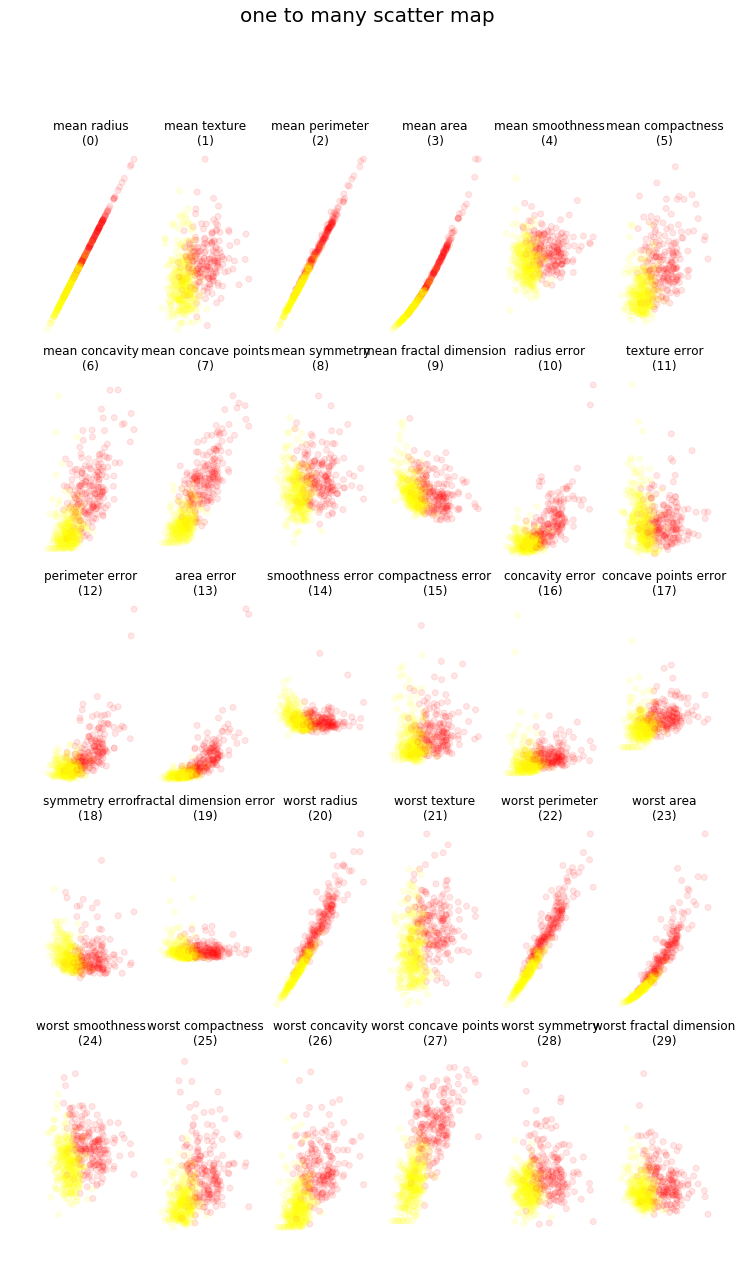

In [46]:
fig,axes = plt.subplots(5,6,figsize=[12,20])
fig.suptitle('one to many scatter map', fontsize=20)

for i in range(30):
    ax=axes.ravel()[i]
    ax.scatter(cancer.data[:,0],cancer.data[:,i], c=cancer.target, cmap='autumn', alpha=0.1)
    ax.set_title(cancer.feature_names[i]+('\n(%d)' % i))
    ax.set_axis_off()

### 상관계수
- Pearson correlation coefficient
- https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

<img src="corrcoef.jpg" />

In [18]:
np.corrcoef(cancer.data[:,0], cancer.data[:,22])

array([[1.        , 0.96513651],
       [0.96513651, 1.        ]])

In [45]:
mat = np.corrcoef(cancer.data.T)
mat.shape

(30, 30)

In [20]:
mat.shape, mat[4,24]

((30, 30), 0.8053241954943631)

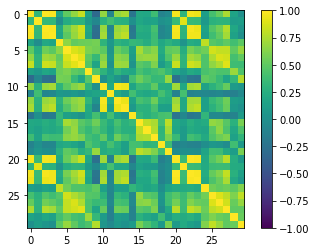

In [47]:
plt.imshow(mat, vmin=-1, vmax=1)
plt.colorbar()

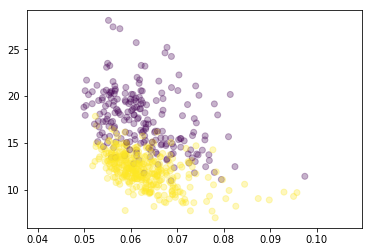

In [24]:
plt.scatter(cancer.data[:,9], cancer.data[:,0], c= cancer.target, alpha=0.3)

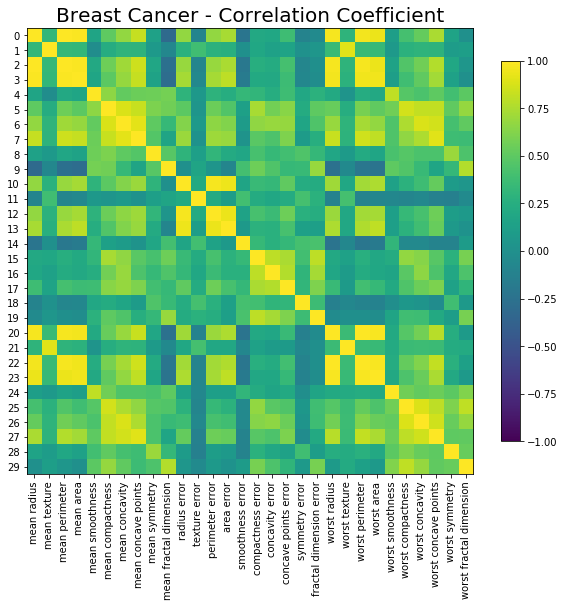

In [25]:
fig=plt.figure(figsize=[10,10])
plt.title('Breast Cancer - Correlation Coefficient',fontsize=20)
plt.imshow(mat, interpolation='none', vmin=-1, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(30),cancer.feature_names,rotation=90,ha='center')
plt.yticks(range(30))
print('')

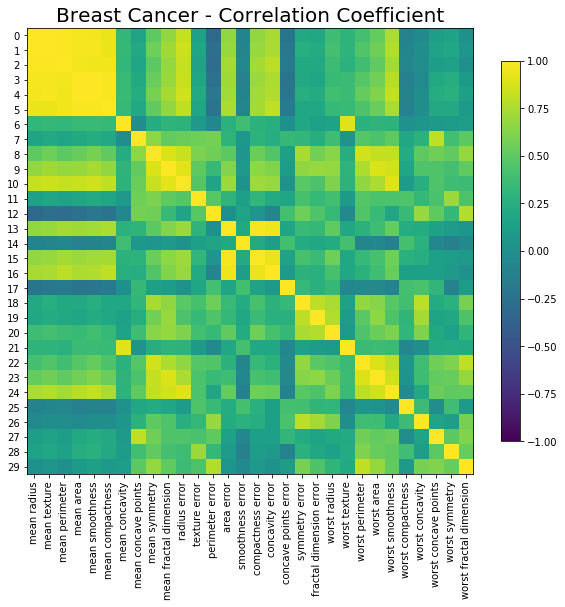

In [26]:
l = [0,2,3,20,22,23, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 25, 26, 27, 18,19,24,28, 29]

cancer2 = cancer.data[:,l]
mat2 = np.corrcoef(cancer2.T)


fig=plt.figure(figsize=[10,10])
plt.title('Breast Cancer - Correlation Coefficient',fontsize=20)
plt.imshow(mat2, interpolation='none', vmin=-1, vmax=1)
plt.colorbar(shrink=0.7)
plt.xticks(range(30),cancer.feature_names,rotation=90,ha='center')
plt.yticks(range(30))
print('')

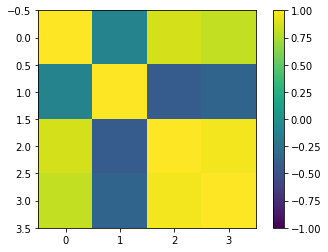

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()

a = np.corrcoef(iris.data.T)

plt.imshow(a, vmin=-1, vmax=1)
plt.colorbar()

In [28]:
a

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

### 정규화

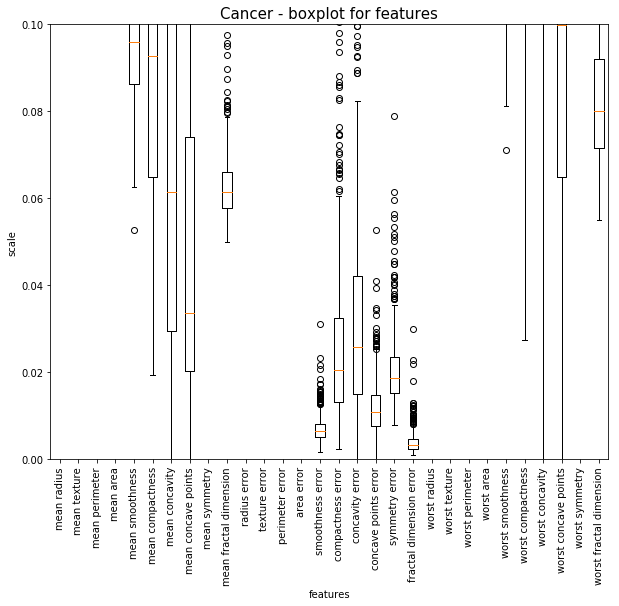

In [22]:
fig=plt.figure(figsize=[10,8])
plt.title('Cancer - boxplot for features', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.ylim(0, 0.1)
plt.xlabel('features')
plt.ylabel('scale')
print('')

- 평균으로 나눈 결과

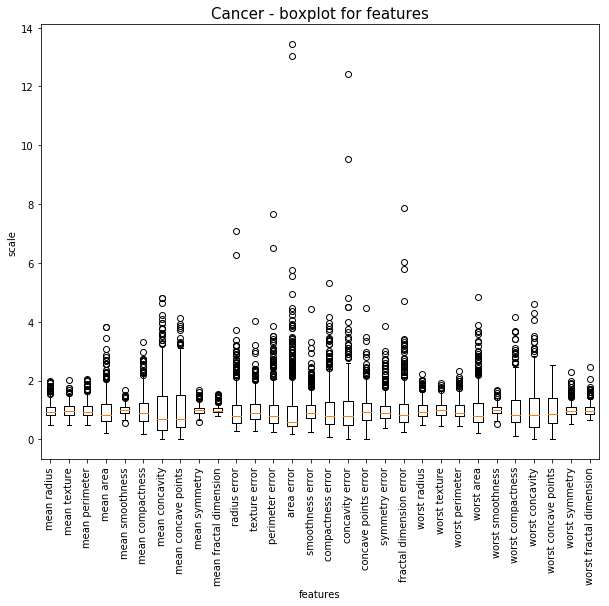

In [24]:
fig=plt.figure(figsize=[10,8])
plt.title('Cancer - boxplot for features', fontsize=15)
plt.boxplot(cancer.data/cancer.data.mean(axis=0))
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
#plt.ylim(0, 0.1)
plt.xlabel('features')
plt.ylabel('scale')
print('')

In [25]:
a = np.arange(1,6)
a

array([1, 2, 3, 4, 5])

In [26]:
a.mean()

3.0

In [27]:
a.std()

1.4142135623730951

In [28]:
b = a - a.mean()
b

array([-2., -1.,  0.,  1.,  2.])

In [29]:
b.mean()

0.0

In [30]:
b.std()

1.4142135623730951

In [31]:
c = b/b.std()
c

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [32]:
c.mean(), c.std()

(0.0, 0.9999999999999999)

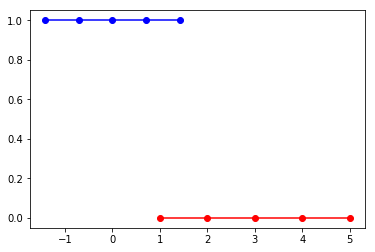

In [34]:
plt.plot(a, [0]*5, 'ro-')
plt.plot(c, [1]*5, 'bo-')

In [ ]:
(a - a.mean())/a.std()

In [35]:
c * a.std() + a.mean()

array([1., 2., 3., 4., 5.])

In [ ]:
c = (a-a.mean())/a.std()   # a = c*a.std() + a.mean()

In [37]:
a = np.random.randint(10, size=[4,3])
a

array([[2, 2, 7],
       [4, 0, 3],
       [0, 5, 0],
       [7, 5, 8]])

In [38]:
a.mean(axis=0)

array([3.25, 3.  , 4.5 ])

In [39]:
a - a.mean(axis=0)

array([[-1.25, -1.  ,  2.5 ],
       [ 0.75, -3.  , -1.5 ],
       [-3.25,  2.  , -4.5 ],
       [ 3.75,  2.  ,  3.5 ]])

In [40]:
(a - a.mean(axis=0)) / a.std(axis=0)

array([[-0.48336824, -0.47140452,  0.78086881],
       [ 0.29002095, -1.41421356, -0.46852129],
       [-1.25675744,  0.94280904, -1.40556386],
       [ 1.45010473,  0.94280904,  1.09321633]])

In [41]:
(a - a.mean(axis=1).reshape(4,1)) / a.std(axis=1).reshape(4,1)

array([[-0.70710678, -0.70710678,  1.41421356],
       [ 0.98058068, -1.37281295,  0.39223227],
       [-0.70710678,  1.41421356, -0.70710678],
       [ 0.26726124, -1.33630621,  1.06904497]])

In [42]:
aT = a.T
((aT - aT.mean(axis=0)) / aT.std(axis=0)).T

array([[-0.70710678, -0.70710678,  1.41421356],
       [ 0.98058068, -1.37281295,  0.39223227],
       [-0.70710678,  1.41421356, -0.70710678],
       [ 0.26726124, -1.33630621,  1.06904497]])

- cancer.data 를 평균을 0, 표준편차를 1로 변환하자

In [43]:
# 속성별 평균
m = cancer.data.mean(axis=0)

# 속성별 표준편차
s = cancer.data.std(axis=0)

# 정규화된 데이터
data2 = (cancer.data - m) / s

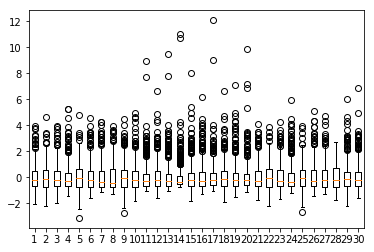

In [44]:
plt.boxplot(data2)
pass

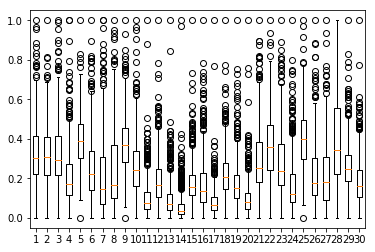

In [32]:
m1 = cancer.data.max(axis=0)
m2 = cancer.data.min(axis=0)

# 정규화된 데이터
data2 = (cancer.data - m2) / (m1-m2)

plt.boxplot(data2)
pass

### k-NN, LinearSVC, LogisticRegression 적용
- train_test_split() 적용 후 score 확인
- 원본 데이터와 정규화된 데이터 비교
- 10번 반복해서 Logistic Regression 과 선형 SVM 을 적용해 보자. train_test_split() 함수에서 랜덤하게 데이터를 나누기 때문에 매번 점수가 달라진다.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

scores = []

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

    model = KNeighborsClassifier()
    model.fit(X_train,y_train)

    score = model.score(X_test,y_test)
    scores.append(score)

print('scores =', scores)

scores = [0.951048951048951, 0.9090909090909091, 0.8951048951048951, 0.9230769230769231, 0.965034965034965, 0.9300699300699301, 0.8951048951048951, 0.8881118881118881, 0.9300699300699301, 0.9370629370629371]


In [34]:
from sklearn.linear_model import LogisticRegression

scores = []

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

    model = LogisticRegression()
    model.fit(X_train,y_train)

    score = model.score(X_test,y_test)
    scores.append(score)

print('scores =', scores)

scores = [0.9370629370629371, 0.9440559440559441, 0.9300699300699301, 0.9370629370629371, 0.951048951048951, 0.951048951048951, 0.951048951048951, 0.958041958041958, 0.958041958041958, 0.958041958041958]


In [35]:
from sklearn.svm import LinearSVC

scores = []

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target)

    model = LinearSVC()
    model.fit(X_train,y_train)

    score = model.score(X_test,y_test)
    scores.append(score)

print('scores =', scores)

scores = [0.951048951048951, 0.9230769230769231, 0.8741258741258742, 0.916083916083916, 0.916083916083916, 0.8881118881118881, 0.8741258741258742, 0.9090909090909091, 0.965034965034965, 0.9090909090909091]


In [36]:
m = cancer.data.mean(axis=0)
s = cancer.data.std(axis=0)
data2 = (cancer.data - m) / s

scores = []

for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(data2, cancer.target)

    model = LinearSVC()
    model.fit(X_train,y_train)

    score = model.score(X_test,y_test)
    scores.append(score)

print('scores =', scores)

scores = [0.972027972027972, 0.9230769230769231, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.9790209790209791, 0.958041958041958, 0.972027972027972, 0.9440559440559441, 0.965034965034965]
